# Find most frequent sold items

find top 10 items

in result tsv(csv with tab) will be formed:
    - rows: sales
    - column: items

### import

In [17]:
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from pandas import read_csv

import matplotlib.pyplot as plt  # будем отображать графики прямо в jupyter'e
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


### read sales data

In [3]:
def read_tsv_utf8(path):
    return read_csv(path, sep='\t', encoding='utf-8') 

data_raw2014 = read_tsv_utf8("~/Documents/imagineML/data/sales2014.csv") 
data_raw2015 = read_tsv_utf8("~/Documents/imagineML/data/sales2015.csv")
data_raw2016 = read_tsv_utf8("~/Documents/imagineML/data/sales2016.csv")
data_raw2017 = read_tsv_utf8("~/Documents/imagineML/data/sales2017.csv")
data_raw2018 = read_tsv_utf8("~/Documents/imagineML/data/sales2018.csv") 

item_keys = read_tsv_utf8("~/Documents/imagineML/data/itemkeys.csv")
item_keys.set_index('item_key', inplace=True)

### aggregate data

In [4]:
df = pd.concat([data_raw2014, data_raw2015, data_raw2016, data_raw2017, data_raw2018], axis=0)
df = df[['key', 'date', 'sales']]
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

### formed continuous time-series for each one

In [5]:
temp = df[['date', 'key', 'sales']]
temp
temp['month_str'] = temp['date'].map(lambda x: x.month).astype(str)
temp['year_str'] = temp['date'].map(lambda x: x.year).astype(str)
temp['day'] = temp['date'].map(lambda x: x.day)

def getGrouppedSales(temp_df):
    temp_df = temp_df.groupby(['key', 'key_date'])['sales'].sum()
    temp_df = temp_df.to_frame().reset_index()
    groupped_sales = temp_df.pivot(index='key_date', columns='key', values='sales')   
    groupped_sales.reset_index(level=0, inplace=True)
    del temp_df
    return groupped_sales

#### month

In [6]:
temp_month = temp[['key', 'sales', 'date', 'month_str', 'year_str']]
temp_month['key-dt'] = temp_month['year_str'] + "-" + temp_month['month_str'] + "-1"
temp_month['key_date'] = pd.to_datetime(temp_month['key-dt'], format='%Y-%m-%d') 
sales_month = getGrouppedSales(temp_month)
del temp_month
sales_month

key,key_date,1,2,3,4,5,6,7,8,9,...,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029
0,2014-07-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-01,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-10-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-11-01,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-12-01,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-02-01,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-03-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-04-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### find smooth-ratio

In [20]:
sales_month_len = len(sales_month)
def compute_ratio(x):
    return len(sales_month[sales_month[x]>0])/sales_month_len
    
df_ratio = pd.DataFrame({'item': item_keys.index, 'ratio': np.repeat(np.nan, len(item_keys.index))})
df_ratio.reset_index(drop=True)
df_ratio['ratio'] = df_ratio['item'].map(lambda x: compute_ratio(x))
df_ratio = df_ratio.sort_values(by=['ratio'],ascending=False)

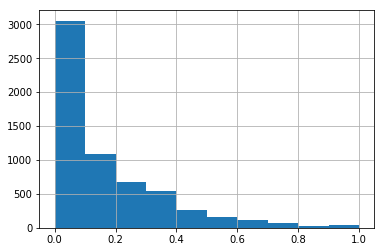

In [23]:
df_ratio['ratio'].hist()

распределение продаж товаров:
- каждый бар - количество наименований
- 0 - редко продается
- 1 - часто продается

### select and save continious time series

In [12]:
smooth_threashold = 0.9

selected_items = df_ratio[df_ratio['ratio'] > smooth_threashold].item
selected_columns = selected_items.append(pd.Series('key_date'))
selected = sales_month[selected_columns]

selected

key,4911,4752,5388,3442,3523,262,263,2870,4822,4929,...,2275,715,5795,5796,1739,3369,4681,4281,2428,key_date
0,17.0,10.0,13.000,17.0,5.0,19.0,53.0,46.0,4.0,7.0,...,1.0,NaN,2.0,2.0,7.0,3.0,5.0,1.0,NaN,2014-07-01
1,34.0,25.0,42.000,59.0,8.0,107.0,104.0,163.0,8.0,17.0,...,2.0,16.0,1.0,NaN,6.0,12.0,2.0,2.0,NaN,2014-08-01
2,38.0,56.0,27.000,35.0,8.0,129.0,80.0,249.0,2.0,12.0,...,3.0,12.0,NaN,NaN,12.0,34.0,2.0,1.0,2.0,2014-09-01
3,75.0,23.0,22.000,67.0,10.0,126.0,127.0,130.0,8.0,30.0,...,4.0,14.0,NaN,NaN,14.0,19.0,18.0,4.0,2.0,2014-10-01
4,79.0,26.0,32.000,52.0,7.0,81.0,98.0,151.0,8.0,24.0,...,3.0,5.0,NaN,NaN,2.0,22.0,10.0,2.0,3.0,2014-11-01
5,120.0,93.0,104.000,46.0,28.0,324.0,254.0,209.0,13.0,48.0,...,16.0,10.0,24.0,20.0,48.0,83.0,6.0,4.0,9.0,2014-12-01
6,46.0,39.0,14.000,32.0,7.0,85.0,67.0,147.0,6.0,9.0,...,3.0,5.0,2.0,1.0,14.0,24.0,15.0,2.0,5.0,2015-01-01
7,82.0,24.0,29.000,52.0,9.0,110.0,108.0,136.0,7.0,23.0,...,10.0,4.0,8.0,16.0,7.0,22.0,12.0,3.0,14.0,2015-02-01
8,22.0,21.0,31.000,27.0,6.0,65.0,79.0,90.0,6.0,20.0,...,7.0,5.0,15.0,6.0,10.0,23.0,3.0,2.0,2.0,2015-03-01
9,22.0,30.0,19.000,18.0,2.0,59.0,53.0,148.0,3.0,10.0,...,4.0,9.0,5.0,9.0,8.0,22.0,8.0,NaN,8.0,2015-04-01


In [22]:
selected.to_csv('~/Documents/imagineML/data/time_series.tsv', sep='\t', encoding='utf-8')